### **Tenzin Yangzom** 
### |**8896839**

**Assignment 3 CSCN8000 Artificial Intelligence Algorithms and Mathematics**


    



1.  Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop the other two features for simplicity.
   
    Figure out if any preprocessing such as scaling would help here
    
    Draw elbow plot and from that figure out optimal value of k

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Using only petal width and length
X = iris.data[:, 2:]  
y = iris.target

In [3]:
# Iris Data
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

Using Elbow method to determine the optimal number of clusters 

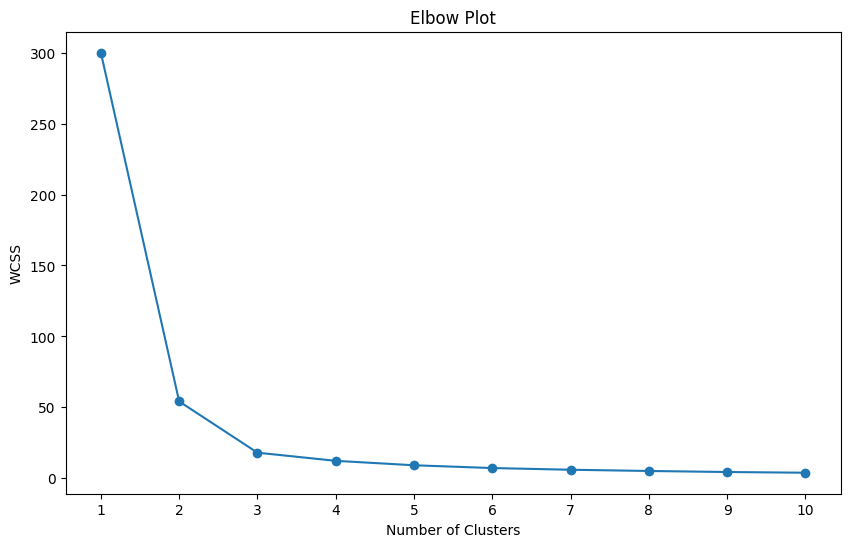

In [6]:


# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.xticks(range(1, 11))
plt.show()


The optimum clusters is where the elbow occurs. i.e  k = 3.
Its when the wcss doesn't decrease significantly with every iteration.

After getting the optimum amount of clusters, will apply K-means clustering to the iris dataset

In [8]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init = 10)
y_kmeans = kmeans.fit_predict(X_scaled)

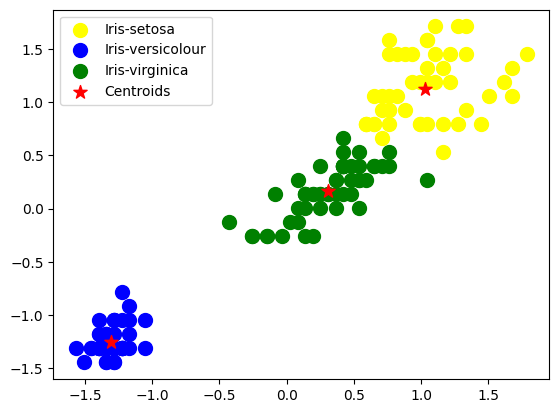

In [9]:
# Visualising the clusters
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, marker='*', c = 'red', label = 'Centroids')

plt.legend()

2.  Use the heart dataset from the Resources Folder or access it from https://www.kaggle.com/fedesoriano/heart-failure-prediction 
   
    Load heart disease dataset in pandas dataframe
   
    Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
    
    Convert text columns to numbers using label encoding / one hot encoding
    
    Apply scaling
    
    Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
    
    Now use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy. 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [11]:
# Load the dataset
data = pd.read_csv('heart.csv')

# Display the first few rows of the DataFrame
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Identify numerical columns for outlier removal
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [22]:
# Remove outliers using Z-score
# Calculate Z-scores and filter outliers
z_scores = np.abs((data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std())
data = data[(z_scores < 3).all(axis=1)]

NameError: name 'numerical_columns' is not defined

In [15]:
# Convert categorical columns to numbers using one-hot encoding
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Use one-hot encoding for categorical columns
heart_data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [16]:
heart_data_encoded.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,True,True,False,False,False,True,False,False,False,True
1,49,160,180,156,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,130,283,98,0.0,0,True,True,False,False,False,False,True,False,False,True
3,48,138,214,108,1.5,1,False,False,False,False,False,True,False,True,True,False
4,54,150,195,122,0.0,0,True,False,True,False,False,True,False,False,False,True


In [17]:
# Split data into features (X) and target (y)
X = heart_data_encoded.drop('HeartDisease', axis=1)
y = heart_data_encoded['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
# Build and evaluate classification models
models = {
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)  # You can choose the number of components based on your preference
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Retrain models with PCA-transformed data
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred_pca = model.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    print(f'{name} Accuracy (with PCA): {accuracy_pca:.4f}')

SVM Accuracy: 0.8750
Logistic Regression Accuracy: 0.8533
Random Forest Accuracy: 0.8750
SVM Accuracy (with PCA): 0.8750
Logistic Regression Accuracy (with PCA): 0.8533
Random Forest Accuracy (with PCA): 0.8641
